Graduate Rotational Internship Program
# The Sparks Foundation
# Data Science & Business Analytics Internship
# Task 2:- Prediction using Unsupervised ML
  (From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually)
  
By:- Jainam Chourdiya

**Importing the libraries**

In [2]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans

**Load and explore the iris dataset**

In [3]:

iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head() 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3


In [4]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [5]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**selecting the data using .iloc**

In [6]:
x = iris_df.iloc[:,:].values

**Finding the optimum number of clusters for k-means classification using Elbow method**

In [7]:

k_range = range(1,11)
sse = [] # Sum of Squares of error(SSE), the cumlative of the distance of each point in a cluster from their respective centroid


for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(iris_df)
    sum_of_squares = km.inertia_
    sse.append(sum_of_squares)
    
print("Sum of Square Value from K = 1 to K = 11 are as followed: ")
sse

Sum of Square Value from K = 1 to K = 11 are as followed: 


[681.3706,
 152.34795176035792,
 78.85144142614601,
 57.228473214285714,
 46.44618205128205,
 39.03998724608725,
 34.60481572112099,
 30.01588095238096,
 27.89061415643853,
 25.988974783479932]

 The Elbow Method is one of the most popular methods to determine this optimal value of k.

**Plotting K_range vs sse to find optimum number of k using elbow methog**

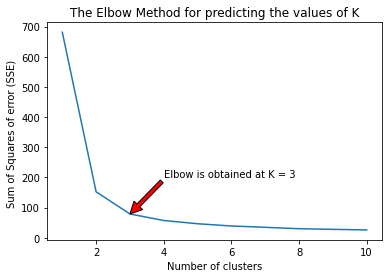

In [8]:

plt.title('The Elbow Method for predicting the values of K')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squares of error (SSE) ') # Within cluster sum of squares
plt.annotate("Elbow is obtained at K = 3", xytext=(4,200),xy=(3,78.8514),arrowprops={'facecolor':'red'})
plt.plot(k_range,sse)
plt.show()

Above plot clearly predict the value of k = 3

**Applying kmeans to the dataset / Creating the kmeans classifier**

In [9]:
# Training model for k=3
Kmean = KMeans(n_clusters = 3)
ypredict = Kmean.fit_predict(iris_df)

In [10]:

ypredict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

creating column "cluster" in iris dataframe having calues of ypredict

In [11]:
iris_df["Cluster"]  = ypredict

In [12]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


**Visualising the Clusters**

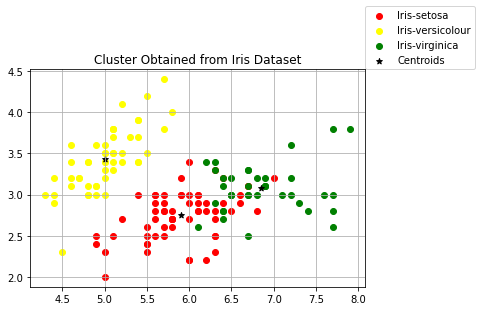

In [17]:
y_Kmeans = Kmean.fit_predict(x)
# Visualising the clusters - On the first two columns
plt.title("Cluster Obtained from Iris Dataset")
plt.scatter(x[y_Kmeans == 0, 0], x[y_Kmeans == 0, 1], c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_Kmeans == 1, 0], x[y_Kmeans == 1, 1], c = 'yellow', label = 'Iris-versicolour')
plt.scatter(x[y_Kmeans == 2, 0], x[y_Kmeans == 2, 1], c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(Kmean.cluster_centers_[:, 0], Kmean.cluster_centers_[:,1], c = 'black', marker='*', label = 'Centroids')
plt.grid()
plt.legend(loc=(1,1))

**So, as for this task we have to find the optimum numbers of clusters and represent it visually as we did above.**